In [4]:
import os
import pandas as pd

In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
pwd

'/home/nbuser/library/Taller01'

# IDEAM

In [7]:
base_dir = os.path.join( '.','data')
output_dir = os.path.join( '.','output')
ciudad = 'Medellin'
fuente = 'IDEAM'
serie_csv = os.path.join(base_dir,ciudad,fuente+'.csv')
serie_pd = pd.read_csv(serie_csv, sep = ';', encoding='latin-1')

In [8]:
def ghi_mensual(serie_horaria):
    agnos = sorted(serie_horaria['AÑO'].unique())
    ghi_df = pd.DataFrame(columns=["AÑO", "MES", "DIAS", "GHImes"])
    for agno in agnos:
        for mes in range(1,13):
            nombre_energia = list(serie_horaria)[-1]
            dias = sorted(serie_horaria[(serie_horaria['AÑO'] == agno) & (serie_horaria['MES'] == mes)]["DIA"].unique())
            ghi_mes = serie_horaria.loc[((serie_horaria["AÑO"] == agno) & (serie_horaria["MES"] == mes)), nombre_energia].sum()/1000
            ghi_dict = {"AÑO":agno, "MES":mes, "DIAS":dias[-1], "GHImes":ghi_mes}
            ghi_df = ghi_df.append(ghi_dict, ignore_index=True)
    return ghi_df

def ghi_dia(serie_ghi_mensual):
    agnos = sorted(serie_ghi_mensual['AÑO'].unique())
    ghi_df = pd.DataFrame(columns=["AÑO", "MES", "GHIdiario"])
    for agno in agnos:
        for mes in range(1,13):
            dias = serie_ghi_mensual.loc[((serie_ghi_mensual["AÑO"] == agno) & (serie_ghi_mensual["MES"] == mes)), "DIAS"].item()
            ghi_diario = serie_ghi_mensual.loc[((serie_ghi_mensual["AÑO"] == agno) & (serie_ghi_mensual["MES"] == mes)), "GHImes"].item()/dias
            ghi_dict = {"AÑO":agno, "MES":mes, "GHIdiario":ghi_diario}
            ghi_df = ghi_df.append(ghi_dict, ignore_index=True)
    return ghi_df

In [9]:
ghi_mensual_loc = ghi_mensual(serie_pd)
ghi_diario_loc = ghi_dia(ghi_mensual_loc)
datos_IDEAM = sorted(ghi_diario_loc["GHIdiario"])

## Calculo de ENFICC

In [10]:
percentil = 0.01
enficc = ghi_diario_loc.quantile(q=percentil, numeric_only=True)["GHIdiario"]
print('La ENFICC 99% es: ', enficc)

La ENFICC 99% es:  3.53519358791


# NREL

In [11]:
base_dir = os.path.join( '.','data')
output_dir = os.path.join( '.','output')
ciudad = 'Medellin'
fuente = 'NREL'
serie_csv_nrel = os.path.join(base_dir,ciudad,fuente+'.csv')
serie_pd_nrel = pd.read_csv(serie_csv_nrel, sep = ';', encoding='latin-1')

In [12]:
def nrel_mensual(serie_horaria):
    agnos = sorted(serie_horaria['AÑO'].unique())
    ghi_df = pd.DataFrame(columns=["AÑO", "MES", "DIAS", "GHImes"])
    for agno in agnos:
        for mes in range(1,13):
            nombre_energia = list(serie_horaria)[-1]
            dias = sorted(serie_horaria[(serie_horaria['AÑO'] == agno) & (serie_horaria['MES'] == mes)]["DIA"].unique())
            ghi_mes = serie_horaria.loc[((serie_horaria["AÑO"] == agno) & (serie_horaria["MES"] == mes)), nombre_energia].sum()/1000
            ghi_dict = {"AÑO":agno, "MES":mes, "DIAS":dias[-1], "GHImes":ghi_mes}
            ghi_df = ghi_df.append(ghi_dict, ignore_index=True)
    return ghi_df

def nrel_dia(serie_ghi_mensual):
    agnos = sorted(serie_ghi_mensual['AÑO'].unique())
    ghi_df = pd.DataFrame(columns=["AÑO", "MES", "GHIdiario"])
    for agno in agnos:
        for mes in range(1,13):
            dias = serie_ghi_mensual.loc[((serie_ghi_mensual["AÑO"] == agno) & (serie_ghi_mensual["MES"] == mes)), "DIAS"].item()
            ghi_diario = serie_ghi_mensual.loc[((serie_ghi_mensual["AÑO"] == agno) & (serie_ghi_mensual["MES"] == mes)), "GHImes"].item()/dias
            ghi_dict = {"AÑO":agno, "MES":mes, "GHIdiario":ghi_diario}
            ghi_df = ghi_df.append(ghi_dict, ignore_index=True)
    return ghi_df

In [13]:
nrel_mensual_loc = nrel_mensual(serie_pd_nrel)
nrel_diario_loc = nrel_dia(nrel_mensual_loc)
datos_NREL = sorted(nrel_diario_loc["GHIdiario"])

## Gráfica comparativa IDEAM y ENFICC

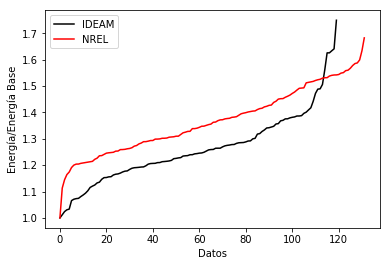

In [14]:
pylab.xlabel("Datos")
pylab.ylabel("Energía/Energía Base")
numdatos = range(len(datos_IDEAM))
numdatosnrel=range(len(datos_NREL))
pylab.plot(numdatos,datos_IDEAM/datos_IDEAM[0],'-k', label='IDEAM')
pylab.plot(numdatosnrel,datos_NREL/datos_NREL[0],'-r', label='NREL')
pylab.legend(loc='upper left')
pylab.savefig(os.path.join(output_dir,'barranquilla_IDEAM.png'), dpi=600)

## Metodología Medición-Correlación-Predicción (MCP)

In [21]:
def periodo (serie_larga,agno,mes_inicio,mes_final):
    a=[]
    for mes in range(mes_inicio,mes_final):
        datos=serie_larga.loc[(serie_pd["AÑO"] == agno)& (serie_pd["MES"] == mes)]
        a.append(datos)
        ghi_df = pd.concat(a)
    return ghi_df

In [22]:
#Ejemplo y prueba de la función período
periodo(serie_pd, 2006, 3, 6)

,AÑO,MES,DIA,HORA,IDEAM
1416,2006,3,1,0,0.000000
1417,2006,3,1,1,0.000000
1418,2006,3,1,2,0.000000
1419,2006,3,1,3,0.000000
1420,2006,3,1,4,0.000000
1421,2006,3,1,5,0.000000
1422,2006,3,1,6,0.000000
1423,2006,3,1,7,20.108586
1424,2006,3,1,8,134.727529
1425,2006,3,1,9,451.437764
